In [6]:
%run ../settings.py
POST_SETTINGS = {
        "image": "img/information.jpg",
        "title": "Introduction to Information Theory",
        "description": "Defining Knowledge, Information, and Entropy",
        "category": "article",
        "tags": ["Information Theory", "Tutorial"]
    }
    

# <ins>Introduction</ins>
> *"If a tree falls in the forest and no one is around to hear it, does it make a sound?"*

Most likely, you are reading this article because you assume it contains some sort of interesting knowledge, \
but what does it mean to know something? Usually when we think of "knowledge" we think of truth, fact or "information" \
An interesting place to start defining knowledge is the observation that if you knew the entire content of this article, ahead of time, then you woudn't gain any knowledge by reading it. \
In other words, if I tell you to read a book, but you already know all of the events in the plot, then the "information" you gain by reading it again would be virtually zero.

Let's extend this idea further: if a tree falls in a forest, how do you know that this event actually happened? \
One way to answer this question is to look at the tree as an "entity" that communicates information to you when it falls.\
If you're standing right next to the tree, then you know it fell when you physically see it falling... the *knowledge* is communicated by all the light scattering off into your eyes, the same way the knowledge contained in 
Similarly, if you're standing i
<br>

In this article, my aim is to arrive at a definition of informaiton and show that an important part of information and subsequently *knowledge* is the process of communication.
<br>

### <ins>The Observer Effect:</ins> 
The falling tree creates various physical signals: sound waves, vibrations in the ground, visual movement, displaced air molecules, etc.
Each of these signals carries potential information about the event.
For this information to be "known," it must be received and processed by another entity.
If no conscious observer is present, the physical phenomena still occur - sound waves propagate through the air, disturbing molecules. However, the information transfer that constitutes knowledge acquisition doesn't complete its journey. The signals exist, but they aren't percieved and decoded into meaningful information by a receiver. 
This brings us to an important distinction between physical phenomena and knowledge.

Physical phenomena exist independently of observation, but knowledge necessarily involves a perceiving entity.\
When we ask if a falling tree "makes a sound," we're actually asking two distinct questions:

* Do compression waves propagate through the air when a tree falls? (A physics question)
* Is the information contained in those waves received, processed, and converted into knowledge? (An epistemological question)

The answer to the first is clearly "yes" - the physical processes occur regardless of observation. The answer to the second depends entirely on the presence of a receiver capable of transforming those signals into knowledge. This distinction highlights the fundamental nature of information: it represents the measurable transfer of knowledge from one entity to another.


To formalize this idea, we define information as a measure of knowledge transfer from an originating source to a recipient that previously lacked that knowledge. This transfer occurs when a signal is not only generated but also received and interpreted.



### Defining information $\I(*)$:
Let us define the information content of an event using the function $\I$, which assigns a value based on the probability of an event occurring:
>$\I(P(X = x)) = f(P(X=x))$, for some function $f(*)$ 


We expect $\I$ to have the following properties:
<div className="definition-properties">

$\I : [0,1] \rightarrow [0, \inf)$
* **An event thats 100% probable, yields no new information.** If we're completely certain of a specific outcome of some event,\
 then we already hold that information and thus measuring the information content of this event gives us a value of 0.
* **The less probable an outcome of an event, the more surprising it is and the more information it yields.**  An outcome with 0% probability, has an information measure that approaches infinity, as we just observed something we believe to be impossible.
* **Information is always positive.** If you think about it, The idea of "negative information" makes no sense. You can't unsurprise someone, just like there is no piece of information that I can tell you that will destroy some piece of information that you already hold.
* **Information is continuous**, We would like I’s domain to be continuous in the interval [0,1]. \
That is, a small change in the probability of an event should lead to a corresponding small change in the surprise that we experience. 

$\I(A \cap B) = \I(A) + \I(B)$ 
* **Information is additive**: If $A$ and $B$ are independent events, then the information gained by observing both should just be information of A + information of B
</div>

<br>


### Finding $f(*)$:
Start with the definition of independent events:\
$P(A \cap B) = P(A) \times P(B)$   

This means:\
$\I(A \cap B) = f(P(A) \times P(B)) = \I(P(A)) + \I(P(B))$


Analyzing Cauchy's functional equations show us that for:\
$f(x \times y) = f(x) + f(y)$

the only function $f(*)$ that satisfies all of the above properties, is:\
$f(x) = Klog(x)$


The only K that satisfies all of our properties defined above is K=-1


# <ins>Self-Information</ins>
> $\I(p) = -log(p)= \log(\frac{1}{p})$ 

From our derivation, we can see that $−log⁡(p)$ satisfies all our desired properties for quantifying information. \
This is known as Shannon information or self-information, named after [Claude Shannon](https://en.wikipedia.org/wiki/Claude_Shannon) who formalized [Information Theory](https://en.wikipedia.org/wiki/Information_theory) in the 1940s.

Here's what $\I(p) $ looks like graphically:

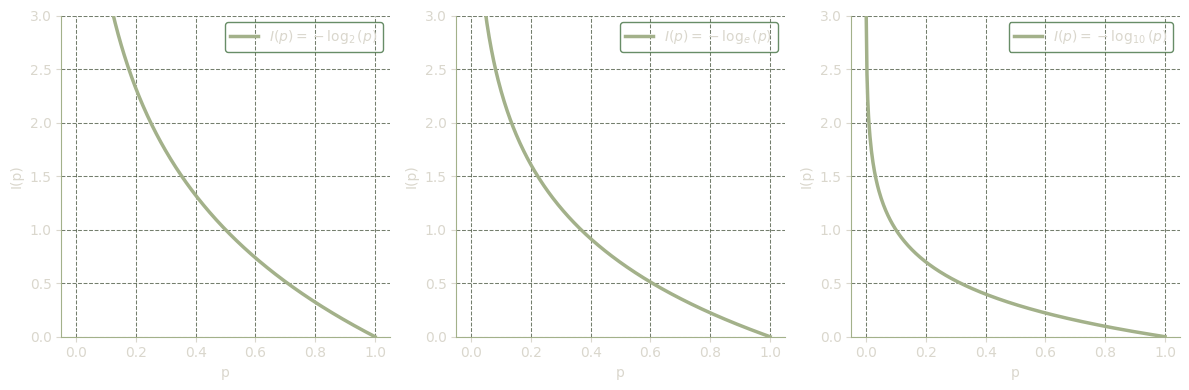

In [8]:
# Generate x values greater than 0 (log is undefined for x ≤ 0)
p = np.linspace(0.001, 1, 400)
log_e = -np.log(p)  # Natural logarithm (base e)
log_2 = -np.log2(p)  # 2
log_10 = -np.log10(p)  # 10


fig, sb = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
sb[0].plot(p, log_2, label=r'$I(p) = - \log_2(p)$')
sb[0].set_xlabel('p')
sb[0].set_ylabel('I(p)')
sb[0].set_ylim([0, 3])
sb[0].legend()
sb[0].grid(True)

sb[1].plot(p, log_e, label=r'$I(p) = - \log_e(p)$')
sb[1].set_xlabel('p')
sb[1].set_ylabel('I(p)')
sb[1].set_ylim([0, 3])
sb[1].legend()
sb[1].grid(True)

sb[2].plot(p, log_10, label=r'$I(p) = - \log_{10}(p)$')
sb[2].set_xlabel('p')
sb[2].set_ylabel('I(p)')
sb[2].set_ylim([0, 3])
sb[2].legend()
sb[2].grid(True)

# Show the plot
plt.tight_layout()
plt.show()


But why does $\I(p)$ change with respect to the base? What does "information content" have to do with which logarhitm we choose?


Turns out, just like I can measure length in meters or feet, the base of the logarithm in our self-information function represents the units in which we measure information.\
Different bases correspond to different measurement systems, most common are:

* Base 2 (log₂): Measures information in **bits** (binary digits), which is useful in digital communication and computing.

* Base e (ln, natural log): Measures information in **nats**, often used in statistical mechanics and probability theory.

* Base 10 (log₁₀): Measures information in **Hartleys**, which is useful in certain engineering applications.




### <ins>Reality is two entities communicating uncertain events</ins>

Another way to interpret "information" is as a measure of surprise rather than amount of knowledge. Think about it, just like the examples before, If you read a certain book that you have completely memorized, then the information you gained is zero. However, if you insisted on reading the book and in the middle of it you surprisingly encounter a brand new chapter that you haven't seen before, then suddenly you have gained a lot of new information. 


This hints at a deeper truth within about information: When we view the entire universe as an entity, we cannot possibly know how complete the information communicated to us is. To put it bluntly, because we cannot with a 80% certainty predict the future, there is always new events to be observed and new physics to be discovered. When we talk events in the real world, we have to assume the information given to us by the universe is **random.** Thus we often wanna measure how uncertain we are about the information content


Let's say we made a bet: I flip a coin, and ask you to predict the answer ahead of time. If your prediction is right, I triple your investment\
If you predict $Tails$, how certain would you be of your answer? Since the probability of getting $Tails$ is $\frac{1}{2}$, you know that there's a 50% chance that you're right... if you we're to play this game over and over again, you would expect to make money over time

Now lets say, before taking your money, I flipped the coin 8 times and showed you the outcomes $X = \set{H,H,T,H,T,H,H,H}$, would you still pick $Tails$? \
Intuitively, the answer is no: out of the 8 flips we only get 2 that are Tails, suggesting that the coin is heavily *biased* in favor of Heads. \
But why are we so inclined to believe the coin is biased only after 8 flips? After all, its entirely possible that we just got a very lucky set of observations.


Since we started with predicting $Tails$, we essentially started with the assumption that the coin will come out $Tails$ with 80% certainty. \
The first observation communicated to us $I(0) = \inf $ information, since our belief didn't think this outcome was even possible.
So, we need to update our model of the future with new possible outcomes: 

Let's assume the coin is fair, then the probabilities of the two outcomes are $P(X = Tails) = P(X = Heads)  = \frac{1}{2}$. \
Now, our updated model tells us that the first flip actually comminicated $\I(\frac{1}{2}) = 1$ bit of information. \
After 8 flips, I would have communicated $8\times\I(\frac{1}{2}) = -8 \times \log_2 (\frac{1}{2}) = 8  $ bits of information about the game. \
If, we assume the observed distribution shows us the true probability, where $P(X = Tails) = \frac{2}{8}$
the information conveyed to us is actually $\I(p_{tails}) = -\log(\frac{1}{3}) \approx 1.585$ bits... substantially higher than if the coin was fair, which makes sense since we're very surprised that our assumed guess isn't the actual outcome.


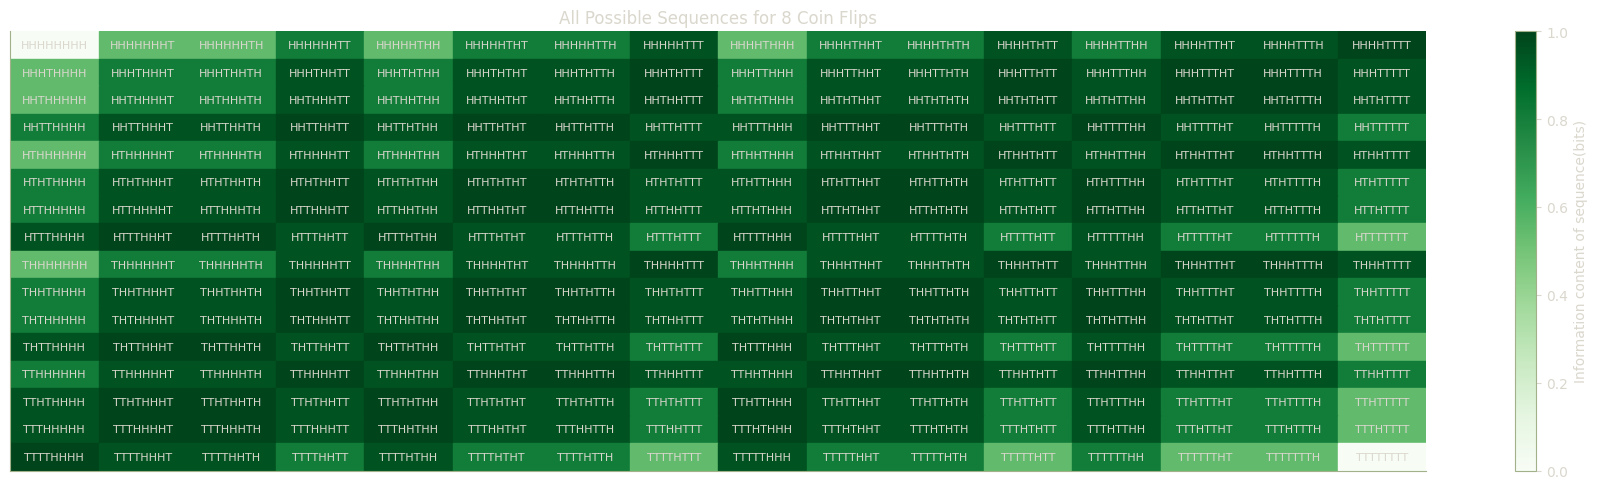

In [3]:
import itertools

# Generate all possible sequences for N flips
N = 8 # Number of flips
sequences = [''.join(seq) for seq in itertools.product('HT', repeat=N)]

# Calculate grid dimensions
total_seqs = len(sequences)  # 2^N
grid_width = int(np.ceil(np.sqrt(total_seqs)))
grid_height = int(np.ceil(total_seqs / grid_width))

# Create properly sized figure
fig, ax = plt.subplots(figsize=(18, 5))
ax.set_xlim(0, grid_width)
ax.set_ylim(0, grid_height)
ax.set_xticks([])
ax.set_yticks([])

probs = np.array([[seq.count('T') / len(seq) for seq in sequences]])


def calc_h(seq):
    n = len(seq)
    p_H = seq.count('H') / n
    p_T = seq.count('T') / n

    H = 0
    if p_H > 0:
        H -= p_H * np.log2(p_H)
    if p_T > 0:
        H -= p_T * np.log2(p_T)

    return H 

entropies = np.array([[calc_h(seq) for seq in sequences]])


heatmap = np.reshape(entropies, (grid_height, grid_width))  # Reshape for heatmap
cax = ax.imshow(heatmap, cmap='Greens', aspect='auto', interpolation='nearest', origin='upper')
fig.colorbar(cax, ax=ax, orientation='vertical', label='Information content of sequence(bits)')


# Plot boxes with text
for i, seq in enumerate(sequences):
    x = i % grid_width
    y = grid_height - 1 - (i // grid_width)  # Start from top row
    
    # Calculate proportion of tails for coloring
    bits = calc_h(seq)
    color = plt.cm.Greens(bits )
    
    ax.add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color=color ))
    ax.text(x + 0.5, y + 0.5, seq, ha='center', va='center', fontsize=8)

plt.title(f"All Possible Sequences for {N} Coin Flips")
plt.tight_layout()
plt.show()


We take the average information conveyed by 3 observations of the coin flip: 




Same as 
$\mathbb{E} (\I(P(X)))$


Let's compare the outcomes the next possible flip, since thats what we're gambling on:
* H:
 $\I(\frac{1}{4}) = 2$  
* T:
 $\I(\frac{2}{4}) = 1$ 


This suggests that if the next bit is a $Tails$, we would be surprised by one whole bit more than if it were a $Heads$ \
But, its still entirely possible this was just witnessed a very lucky streak. \
how do you quantify your uncertainty in this set of observations? 
In other words, what's the probability of observing the exact 3 bits we just witnessed?


how uncertain are we that the coin will always flip to $Tails$?

there are $2^3 = 8$ possible ways that we could have observed 3 coin flips could: 


# Entropy:
The entropy of a discrete random event $X$ with possible outcomes $x_1, x_2, x_3... x_n$ and distributed by the probabilities $P(X = x_i)$  is given by:\

>$$ H(p) = \E[\I(p)] = \sum_{x_i \in X} P(x_i) \log P(x_i) $$


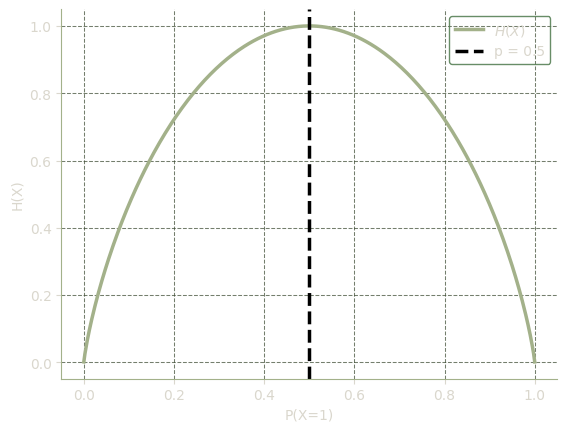

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values greater than 0 (log is undefined for x ≤ 0)
p = np.linspace(0.0001, .9999, 400)
log_e = -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Create the plot
plt.plot(p, log_e, label=r'$H(X)$')
plt.xlabel('P(X=1)')
plt.ylabel('H(X)')
plt.axvline(0.5, linestyle="dashed", color="black", label="p = 0.5")

plt.legend()
plt.grid(True)

# Show the plot
plt.show()

This highlights a fundamental principle: information exists as a potential, but knowledge requires communication. Without an observer, the event still happens, but it does not become known. This reinforces the idea that reality consists of events communicated between entities—and without a receiver, the information does not transition into knowledge.
Entropy, in some sense, is the measure of potential information

coding/encoding:

# <ins>Conclusion:</ins>
Information theory provides a mathematical framework for understanding knowledge as a quantifiable transfer between entities. It suggests that reality itself might be conceived as a network of information exchanges between entities, with knowledge emerging from these exchanges.
When we ask whether a falling tree makes a sound when no one is around to hear it, we're really asking about the nature of information itself—whether it exists independently of being received and interpreted. The mathematical formalism of information theory suggests that while the physical basis for information may exist independently, information as a meaningful concept requires both transmission and reception.